<center><img src=img/MScAI_brand.png width=70%></center>

# Computational Complexity


This notebook will start by reviewing the main idea of computational complexity, and then try to make it practical in the Python context. We will try to explain a lot of things that are usually left unsaid.

Computational efficiency is important! 

Computer scientists realised long ago that the efficiency of an algorithm isn't really well-measured by measuring the "wall clock time" it takes to execute.

We can reduce runtime by buying a faster computer, faster disk, or a better network connection, or rewriting (the same algorithm) in a different language, but that doesn't change the inherent complexity of the algorithm.

Instead, what is important is **how quickly the runtime increases as the size of the input increases (as input gets arbitrarily large)**.



A typical scenario: we run our algorithm with a small input file. It takes 10s to read in the data and 10s to process it. Then we run it on a larger input file. It takes 10m to read in the data, and 3 weeks to process it. The real issue here is the growth in processing from 10s to 3 weeks. We want to ignore the time spent reading the data.

### Assumptions

* A program consists of idealised "instructions" 
* There may be several types of instructions, e.g. multiplying two numbers, or checking for integer equality
* Some may be slower than others, but only by a **constant factor**;
* If one instruction is slower than another by a factor that **depends on program input size**, it is not an instruction -- we have to see it as composed of multiple instructions.

With these assumptions, we can write the runtime as the number of instructions -- a formula in $n$, the size of the input.

* To calculate the row-sum (sum of each row, as a vector) of a square matrix ($n$ rows and $n$ columns):

In [11]:
def row_sum(M):
    R = []
    for L in M:
        R.append(sum(L))
    return R

We have to create an empty list, do $n$ look-ups to get the rows and $n^2$ look-ups to get the individual items, and $n^2$ additions, and append $n$ times to the list. That is a total of $n^2 + 3n + 1$ instructions.

Notice that `sum(L)` is not an instruction, because its runtime depends on the size of the `row_sum` input `M`. Instead, `sum` is composed of multiple instructions.

(But `sum([4, 5, 6])` does not depend on the size of `M`, so it counts as 1.)

### Worst-case

In computational complexity, if the number of instructions could vary (for fixed input size), we usually consider the **worst-case**. This takes care of situations where the algorithm can exit early for a special case or an error: we don't want to count those when measuring complexity.

(There are situations where we'll consider average-case as well, see later.)

* E.g. to check that a given element exists in a list of length $n$:

In [45]:
def element_exists(L, y):
    for x in L: 
        if x == y: return True
    return False

We have to look at all $n$ elements (worst-case). We'll have to look up $n$ items and make $n$ comparisons, so we'll execute $2n$ instructions.

### Asymptotic runtime

"Asymptotic behaviour" means something like "behaviour for arbitrarily large values". In computational complexity, we  only care about the number of instructions executed for large $n$.

How large? 

"Arbitrarily large". For small $n$, the number is probably dominated by setup or reading input, and anyway for small $n$ the program will be fast anyway, so we just don't care about runtime in the first place.

So the runtime is the number of instructions -- a formula in $n$. Now, we are going to argue that in that formula, for large $n$, only the **fastest-growing term** in $n$ matters. 

Let's look at the growth of a few simple terms.

In [7]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 14})

In [41]:
ns = range(2, 21)
growths = {
    "constant": lambda n: 1,
    "logarithmic": lambda n: math.log(n),
    "linear": lambda n: n,
    "log-linear": lambda n: n * math.log(n),
    "quadratic": lambda n: n ** 2
}

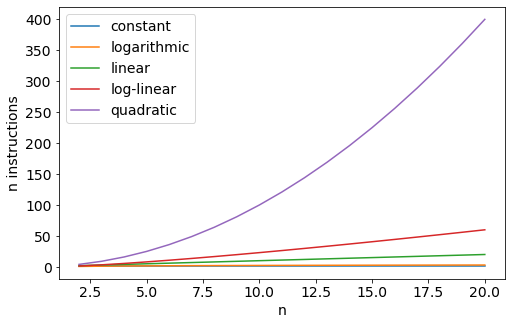

In [42]:
for growth in growths:
    plt.plot(ns, [growths[growth](n) for n in ns], 
             label=growth)
plt.legend(); plt.xlabel("n"); 
plt.ylabel("n instructions");

What we see is a huge discrepancy between terms even for small $n$.

It doesn't matter if we execute 1000$\times$ more instructions in one algorithm than another. Consider `1000*linear`, below.

It also doesn't matter if one algorithm does a lot of extra setup that another doesn't. Consider `100000+linear`, below. 



The `quadratic` function is still far worse than both even for this small $n=2000$.

In [43]:
ns = range(2, 2001)
growths = {
    "linear": lambda n: n,
    "100000+linear": lambda n: n + 100000,
    "1000*linear": lambda n: n * 1000,
    "quadratic": lambda n: n ** 2
}

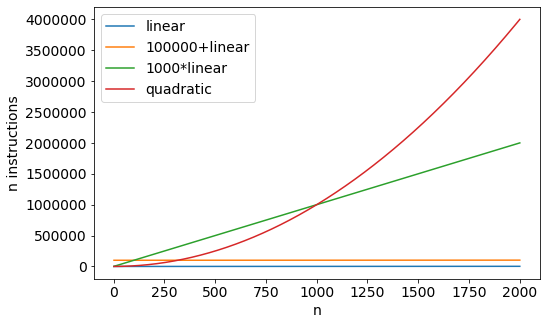

In [44]:
for growth in growths:
    plt.plot(ns, [growths[growth](n) for n in ns], 
             label=growth)
plt.legend(); plt.xlabel("n"); 
plt.ylabel("n instructions");

It also doesn't matter if one type of instruction is (say) 1000$\times$ slower than another: again, consider `1000*linear` above. This justifies our (surprising) assumption that we can treat all instructions as equal.

And, e.g., `sum(range(1000))` counts as **one instruction**.

Therefore, for large $n$, the **number of instructions** of the **fastest-growing term** in $n$ is effectively **proportional** to runtime.

### "Big O" notation

We **ignore** all slow-growing terms. The "Big O" notation ("the order of complexity") does just this:

* Write the total number of instructions as a function of $n$, e.g. $10n^2 + 23n\log(n) + 1000000$
* Drop all but the fastest-growing term and drop its coefficient, and write in "big O" notation: $O(n^2)$.



**Exercise**: consider again the `element_exists(L, x)` function. We saw that its *worst-case* complexity is $O(n)$. What is its *average-case* complexity?

**Answer**: the average-case complexity is still $O(n)$. On average we will have to compare $n/2$ elements, so we'll do $n/2$ lookups and $n/2$ comparisons, giving $O(n)$.

There are a few common "Big O" values. Here they are from slowest- to fastest-growing.

* constant, $O(1)$
* logarithmic, $O(\log(n))$
* linear, $O(n)$
* log-linear aka quasi-linear, $O(n\log(n))$
* quadratic, $O(n^2)$

### Examples

* We already argued that to check a particular item exists in a list of length $n$, we need $2n$ instructions. That is linear, $O(n)$.

* Calculating the row-sum a square matrix of size $n$ is quadratic, $O(n^2)$.


* Sorting a list of length $n$ takes $O(n\log(n))$. 

This is a classic example. It doesn't matter what algorithm you use, it can't be better than $O(n\log(n))$. (There are algorithms which are much worse, e.g. **bubble sort**.) Thus, it is justified to talk about the complexity of the **problem**, not just the complexity of the **algorithm**.

### Rules of thumb

* Every for-loop multiplies by a factor of $n$, e.g. this is $O(n^3)$:

```python
for i in range(n):
    for j in range(n):
        for k in range(n):
            # do something
```

Reading input data can usually be ignored. We usually just assume that reading an input file is $O(n)$, i.e. linear in the number of lines or file size, and so we ignore it. We know that processing won't be sub-linear, so the time spent reading data won't exceed it, so it can be ignored.

People say things like "comparison-based sorting algorithms like Merge sort take only Big O $O(n \log(n))$ and so you can sort just about any amount of data in a feasible time" (https://www.gwern.net/Complexity-vs-AI). Why does $O(n \log(n))$ imply that it is feasible? 

It's because $O(n\log(n))$ is only a little slower than $O(n)$ itself. We already assume that we can read the data in feasible time, otherwise the question of sorting it would not arise. Reading it is $O(n)$. So if we can read it into RAM, we can sort it. If our RAM is not big enough, the sorting algorithm will be bottlenecked by *thrashing*.

Sometimes we might have multiple inputs, e.g. two arrays of sizes $n$ and $m$, or a 2D array of size $n\times m$. In these cases we might need $O()$ expressions in both $n$ and $m$. Alternatively we might just (conservatively) take $n$ to be the larger of $n$ and $m$.

The most important difference in practice is between linear and log-linear algorithms and quadratic. 

In a linear algorithm, "you took some input and did something simple to each element" (Accidentally Quadratic, http://accidentallyquadratic.tumblr.com/post/113840433022/why-accidentally-quadratic).

A quadratic algorithm can occur if we need to traverse the whole input once for every element of the input. 

$O(n\log n)$ can occur if we take something like that and improve it with a tree structure, because the cost of traversing a tree from root to leaf is often $O(\log n)$.

Another place $O(n\log n)$ occurs is in sorting algorithms, and one "reason" why it occurs there is that some algorithms work recursively, and so induce an implicit binary tree structure of function calls. 


Exponential and factorial algorithms seem to occur mostly as algorithms that our common sense would probably tell us not to write in the first place.

### Situations not governed by computational complexity

Suppose we are running a webserver. Every request that comes in is approximately the same, small, size. We don't care about asymptotic complexity. We **do** care about the setup time and the coefficients!

We only care about computational complexity if we're going to have large inputs. Someone once criticised me for using an $O(n^2)$ algorithm instead of $O(n)$ in a situation where we knew $n < 7$. You might say "well $6 < 6^2$, so it will be faster". 

But remember that for small $n$ the assumptions break down: we can't ignore the coefficient or the "slow-growing" terms. E.g. for $n < 7$, $n^2 < 20 + 3n$.

### Complexity in Python data structures

We have been discussing idealised instructions. How do they correspond to Python source code?

Well, it turns out that many of the operations of the Python compound datatypes (`list`, `set`, `dict`, `tuple`) take time which depends on the size of the object (e.g. `list.find` takes time proportional to the length of the `list`).

Therefore, we can't regard these as idealised instructions! Instead we have to see them as composed of multiple instructions and calculate how many of *those* there are.

### Time complexity of basic Python operations

The basic Python data types (list, tuple, set, dict, and a couple of
  others) offer various operations, with various time
  complexities. They make different trade-offs between time and memory
  usage in different common cases and worst cases. Sometimes the right
  choice can make a huge difference to our efficiency.

Sources:

* https://www.ics.uci.edu/~pattis/ICS-33/lectures/complexitypython.txt
* https://wiki.python.org/moin/TimeComplexity
* Downey, *Think Python*, Appendix B 
* Downey, *Think Complexity*, Chapter 3.


### Lists

```
8   [ ][ ][ ][ ][ ][ ][ ][ ]
                          ^
```

  A Python `list` is represented internally as an **array**
  (contiguous cells in memory). Many operations involve iterating over
  the items: $O(n)$. However, it stores a pointer to the end (so `append`
  is constant-time) and remembers its length (so no need to iterate for `len`).

  A `list` is also fast for changes at the end, but slow for changes near the
  beginning: e.g. deleting the first item means that all other items
  have to "move".

* $O(1)$: append, get and set item (`[]`), `len`
* $O(n)$: insert item, delete item, iterate over, `min`, `x in L`

### Tuple

Similar to list, for the operations that are allowed.


### Dictionaries

Recall that a **hash function** is the crucial ingredient in implementing 
`dict`s. (In fact, also in `set`s.) A hash function maps an object to an integer,
uniformly distributed over some wide range.

Recall that Python offers a general hash function `hash`, and some objects are **not hashable**.

In [14]:
print(hash(2))
print(hash('abc'))
print(hash([5, 6, 7]))

2
6999911826370106077


TypeError: unhashable type: 'list'

### Implementing a dictionary from scratch


  (Warning: this is for illustration/intuition: the internal implementation is
    much more complicated)

Suppose we have a language with lists, but no dictionaries. To make a dictionary, we make a **list** `L` of some small
    fixed size, e.g. 10, and fill with non-values:
```python
L = [(None, None), (None, None), ... (None, None)]
```

To add a key `k` with value `v`, we calculate a "bucket" or "pigeonhole"
which tells us where to write that key-value:
```python
i = hash(k) % 10
```
and we set 
```python
L[i] = (k, v)
```

To later retrieve the value for key `k`, we calculate `i` and get `L[i]`: its first element is `k` and second is `v`.

### Dictionary performance
* Calculating `hash` and looking up `list` element `i` are both $O(1)$ operations! 
  * (Constant with respect to the number of elements "filled" in `L`.)
* However, a dict uses extra memory in return for this speedup:
  * It makes a list of size 10, even when the dict is empty!
* For many situations, this trade-off is well worth it.

### Hash collisions

But sometimes two keys `k1`, `k2` could get the same `i` -- called a
*hash collision*

```python
hash(2) % 10 # 2
hash('abc') % 10 # 2
```

So we need a bit more logic to avoid over-writing an existing
key-value, or returning the wrong value, or reporting that an key is
present when it's not.



Because each element of the list contains the key, we
can use an approach which checks it. One idea is called *linear probing*:

When we are about to add a key-value pair
at location `L[i]`, and there's already a *different* key
there, just go to `L[i+1]` and see if there is an empty space there (and repeat as needed). (And the same thing when retrieving.)

This works as long as the list is sparsely populated, so there are few collisions and most linear probes end quickly.

But eventually, if we keep adding key-values, we'll find a lot of
collisions, so we'll spend forever linear probing, and get
bad performance. Even worse, when the dictionary gets full, there's no space for new elements!

At that point we have to **re-hash**: 

* Make a new, much larger list `L`;
* Re-calculate all the indices (`% len(L)`);
* Copy each old element to its new location in the new list.

That will take a long time, so our **worst-case time** for item addition is $O(n)$. But it happens **rarely**.

### Amortized analysis

* Typically, adding an entry to a `dict` takes $O(1)$;
* Very rarely, it takes $O(n)$;
* On average across many additions to a single `dict`, performance is practically constant-time.

Since in any higher-level algorithm using `dict` we can expect to be adding to it many times, we are justified in using the `dict` average-case instead of worst-case. This is called **amortized analysis**.


### Dictionary performance

  Thus, we have $O(1)$ average-case performance for common dict
  operations:
* $O(1)$: `x in d`, add item, retrieve item, delete item, `len`
* $O(n)$: iterate over items

### Sets

  We could implement a set as a dictionary with keys and dummy values!

  That is, for a set element `x` we would use the key-value pair
  `(x, x)`.

  In early Python, that's how `set` was implemented. (It's
  optimized now.)

Result: the same $O(1)$ performance for common operations:

* $O(1)$: `x in s`, add item, delete item, `len`
* $O(n)$: iterate over items

**Exercise**: which is faster: `x in L` or `x in S` or `x in d`? (`list`, `set`, or `dict`)

**Solution**: `x in S` and `x in d` are both $O(1)$ while `x in L` is $O(n)$. 

"The performance of dictionaries is one of the minor miracles of
  computer science." -- Downey, *Think Complexity*.

### Double-ended queue

  A list is fast for changes at the end, but slow for changes near the
  beginning.  If modelling a true queue we would probably want to optimise for `append` (add at the end) and
  `popleft` (remove from the front).

  But Python provides a double-ended queue (`deque`) which makes both
  ends fast.

* $O(1)$: append, appendleft, pop, popleft, `len`
* $O(n)$: get, set or remove element in the middle

### Implications

Many of our algorithms depend for run-time on careful choice of data structure
* E.g. breadth-first search needs queue behaviour ("first-in, first-out"). We can emulate this behaviour using a list (append new item at one end, copy item and delete at the other), but this will be slow: a deque is much better.

### Example: Complexity of ML algorithms

* What is the complexity of logistic regression?



* The **training** and the **prediction** algorithms are totally different!
* What is $n$?

* For **prediction**, we take in a vector $x$. We predict the probability $p = 1/(1+e^{-wx})$. 
* The only possible $n$ is the number variables, i.e. `len(x)`. The calculation takes just $O(n)$.
  

* For **training**, we have an input dataset with $n$ variables, and $m$ examples, and (suppose we use gradient descent) we iterate for some number of iterations $s$. It should be clear that our complexity will be **linear** in $m$ and in $n$ and in $s$, so it is $O(nms)$. Depending on what we are trying to achieve, we could just call that e.g. $O(m)$ (treating $n$ and $s$ as fixed).

Caveat: we'll set $s$ in a way that may depend a bit on the difficulty of the problem!